# COURSE: A deep understanding of deep learning
## SECTION: FFNs
### LECTURE: CodeChallenge: Data normalization
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

Challenge 0:

1) Adopt the FFN from the previous video.
2) Normalize (not binarize) the training data to a range of [0 1].
3) Normalize the test data to a range of [0 1].
4) Plot losses and accuracy for train and test.

Challenge 1:

1) Adopt the FFN from the previous video.
2) Normalize (not binarize) the training data to a range of [0 1].
3) Leave the test data in the original range [0 255].
4) Plot losses and accuracy for train and test.

Challenge 2:

1) Adopt the FFN from the previous video.
2) Normalize (not binarize) the test data to a range of [0 1].
3) Leave the training data in the original range [0 255].
4) Plot losses and accuracy for train and test.

In [114]:
# import libraries
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# Import and process the data

In [115]:
# import dataset (comes with colab!)
# data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

# import dataset from datasets directory
data = np.loadtxt(open('../datasets/mnist_train_small.csv', 'rb'), delimiter = ',')

# extract labels (number IDs) and remove from data
labels = data[:, 0]
data   = data[:, 1:]

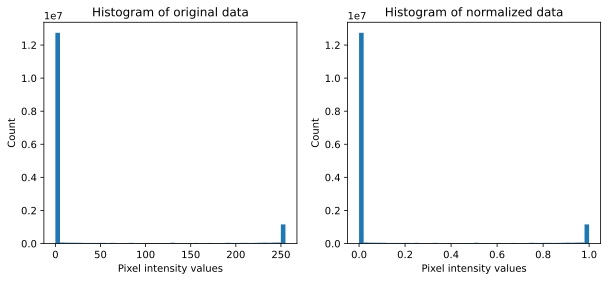

In [116]:
# normalize the data to 0 or 1
# dataNorm = (data > 0).astype(float)
dataNorm = data / np.max(data)

fig,ax = plt.subplots(1, 2, figsize = (10, 4))
ax[0].hist(data.flatten(),50)
ax[0].set_xlabel('Pixel intensity values')
ax[0].set_ylabel('Count')
ax[0].set_title('Histogram of original data')
# ax[0].set_yscale('log')

ax[1].hist(dataNorm.flatten(), 50)
ax[1].set_xlabel('Pixel intensity values')
ax[1].set_ylabel('Count')
ax[1].set_title('Histogram of normalized data')

plt.show()

In [117]:
# confirm that the data have limited values
print(np.unique(data))
print('')
print(np.unique(dataNorm))

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 

# Create train/test groups using DataLoader

In [118]:
# Step 1: convert to tensor
dataTNorm = torch.tensor(dataNorm).float()
dataT     = torch.tensor(data).float()
labelsT   = torch.tensor(labels).long() # long = int64

# Step 2: use scikitlearn to split the data
train_dataNorm, test_dataNorm, train_labelsNorm, test_labelsNorm = train_test_split(dataTNorm, labelsT, test_size = .1)
train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, test_size = .1)


# Step 3: convert into PyTorch Datasets
train_data = TensorDataset(train_dataNorm, train_labelsNorm)
test_data  = TensorDataset(test_dataNorm, test_labelsNorm)
# train_data = TensorDataset(train_data, train_labels)
# test_data  = TensorDataset(test_data, test_labels)

# Step 4: translate into dataloader objects
batchsize    = 32
train_loader = DataLoader(train_data, batch_size = batchsize, shuffle = True, drop_last = True)
test_loader  = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [119]:
# confirm ranges of train and test data

print('Train data range %g to %g'
      %(torch.min(train_data.tensors[0]),
        torch.max(train_data.tensors[0])))

print('Test data range %g to %g'
      %(torch.min(test_data.tensors[0]),
        torch.max(test_data.tensors[0])))



Train data range 0 to 255
Test data range 0 to 1


In [120]:
# check all variables in workspace
%whos

Variable                 Type             Data/Info
---------------------------------------------------
DataLoader               type             <class 'torch.utils.data.dataloader.DataLoader'>
F                        module           <module 'torch.nn.functio<...>/torch/nn/functional.py'>
TensorDataset            type             <class 'torch.utils.data.dataset.TensorDataset'>
X                        Tensor           tensor([[0., 0., 0.,  ...<...>, 0.,  ..., 0., 0., 0.]])
ax                       ndarray          2: 2 elems, type `object`, 16 bytes
batchsize                int              32
createTheMNISTNet        function         <function createTheMNISTNet at 0x3554eff60>
data                     ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataNorm                 ndarray          20000x784: 15680000 elems, type `float64`, 125440000 bytes (119.62890625 Mb)
dataT                    Tensor           tensor([[0., 0., 0.,  ...<...

# Create the DL model

In [121]:
# create a class for the model
def createTheMNISTNet():
  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784, 64)

      ### hidden layer
      self.fc1 = nn.Linear(64, 32)
      self.fc2 = nn.Linear(32, 32)

      ### output layer
      self.output = nn.Linear(32, 10)

    # forward pass
    def forward(self,x):
      x = F.relu(self.input(x))
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      return torch.log_softmax(self.output(x), axis = 1)
      # NEW HERE: log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss

  # create the model instance
  net = mnistNet()

  # loss function
  lossfun = nn.NLLLoss()

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(), lr = .01)
  # change to Adam to improve model performance

  return net,lossfun,optimizer

In [122]:
# test the model with one batch
net, lossfun, optimizer = createTheMNISTNet()

X,y = next(iter(train_loader))
yHat = net(X)

# values are log-probability of each number (0-9)
print(yHat.shape)
# print(yHat)
print(torch.exp(yHat))

# now let's compute the loss
loss = lossfun(yHat,y)
print(' ')
print('Loss:')
print(loss)

torch.Size([32, 10])
tensor([[4.0998e-06, 1.8346e-03, 5.9101e-03, 1.9156e-01, 6.8553e-01, 1.0573e-01,
         2.0799e-04, 2.4453e-04, 8.9595e-03, 1.1572e-05],
        [6.7221e-06, 1.5381e-02, 1.1251e-02, 2.3596e-01, 2.6589e-01, 4.1642e-01,
         2.1288e-03, 4.9713e-03, 4.7976e-02, 1.5344e-05],
        [2.7199e-03, 5.6296e-03, 4.2797e-02, 4.8837e-02, 4.7832e-02, 8.0840e-01,
         2.1307e-02, 2.7439e-03, 9.5094e-03, 1.0226e-02],
        [1.7587e-03, 2.1259e-02, 1.3090e-02, 1.5081e-01, 4.6267e-01, 1.9123e-01,
         3.2272e-02, 3.3060e-02, 9.3822e-02, 2.9398e-05],
        [1.5447e-03, 5.1253e-04, 2.3927e-02, 2.2545e-01, 4.3780e-01, 2.9258e-01,
         4.5441e-04, 2.8386e-04, 1.5658e-02, 1.7836e-03],
        [8.9897e-04, 9.3101e-03, 6.1177e-03, 1.8856e-01, 1.9780e-01, 4.9323e-01,
         1.2737e-02, 3.2298e-03, 8.8068e-02, 5.4088e-05],
        [2.0291e-05, 3.6619e-03, 5.2574e-03, 8.5920e-02, 5.2333e-01, 3.7007e-01,
         2.2592e-03, 3.0768e-04, 9.1666e-03, 4.6024e-06],
      

# Create a function that trains the model

In [123]:
# a function that trains the model

def function2trainTheModel():
  # number of epochs
  numepochs = 60

  # create a new model
  net, lossfun, optimizer = createTheMNISTNet()

  # initialize losses
  losses   = torch.zeros(numepochs)
  trainAcc = []
  testAcc  = []


  # loop over epochs
  for epochi in range(numepochs):
    # loop over training data batches
    batchAcc  = []
    batchLoss = []

    for X, y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat, y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat, axis = 1) == y    # booleans (false/true)
      matchesNumeric = matches.float()               # convert to numbers (0/1)
      accuracyPct = 100 * torch.mean(matchesNumeric) # average and x100
      batchAcc.append(accuracyPct)                   # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append(np.mean(batchAcc))

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X, y = next(iter(test_loader)) # extract X, y from test dataloader
    yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append(100 * torch.mean((torch.argmax(yHat, axis = 1) == y).float()) )

  # end epochs

  # function output
  return trainAcc, testAcc, losses, net


# Run the model and show the results!

In [124]:
trainAcc,testAcc,losses,net = function2trainTheModel()


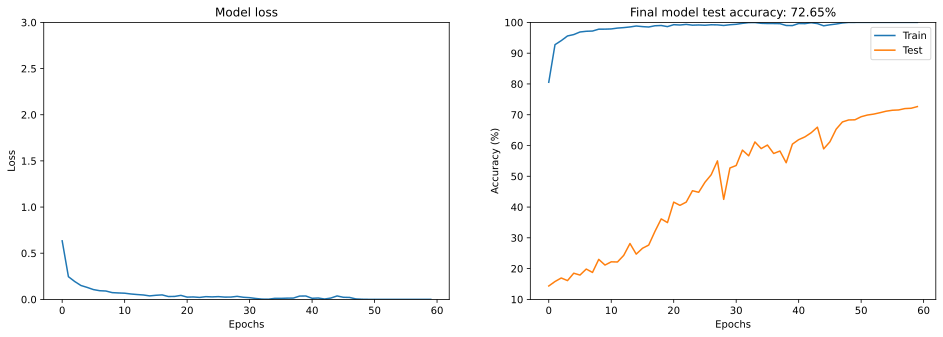

In [125]:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## Binarization:
- Challenge 0: 94.55%
- Challenge 1: 93.70%
- Challenge 2: 57.85%

## Normalization:
- Challenge 0: 95.35%
- Challenge 1: 96.40%
- Challenge 2: 72.65%

# Inspect the results in more detail

In [126]:
# run the model through for the test data
X,y = next(iter(test_loader))
predictions = net(X).detach()

# predictions
torch.exp(predictions)

tensor([[0.0965, 0.1091, 0.1079,  ..., 0.1121, 0.1008, 0.0974],
        [0.0982, 0.1040, 0.0966,  ..., 0.0932, 0.0950, 0.0994],
        [0.0940, 0.1202, 0.0974,  ..., 0.0993, 0.0999, 0.1008],
        ...,
        [0.0966, 0.1079, 0.1063,  ..., 0.0964, 0.1050, 0.0925],
        [0.0971, 0.1056, 0.0987,  ..., 0.0980, 0.0955, 0.0964],
        [0.0937, 0.0998, 0.0811,  ..., 0.0944, 0.0991, 0.1030]])

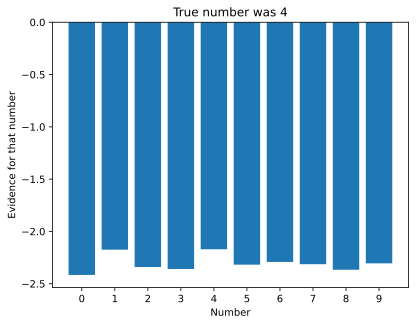

In [127]:
# Evidence for all numbers from one sample
sample2show = 120

plt.bar(range(10),predictions[sample2show]) # try adding exp!
plt.xticks(range(10))
plt.xlabel('Number')
plt.ylabel('Evidence for that number')
plt.title('True number was %s' %y[sample2show].item())
plt.show()

[   3    9   10   12   13   18   27   30   32   37   43   46   50   54
   57   67   68   71   79   83   84   91  103  105  108  121  124  129
  135  139  142  145  149  154  159  160  168  171  175  179  181  182
  190  191  193  196  199  201  203  210  224  226  227  230  232  240
  246  247  260  266  268  269  276  277  281  282  283  284  289  290
  291  292  293  298  301  305  306  307  308  309  311  315  319  320
  321  323  330  332  333  335  337  340  343  344  349  352  358  362
  364  367  368  372  383  384  393  397  398  403  404  410  416  417
  421  431  432  433  435  444  446  448  451  452  454  456  462  464
  466  469  470  472  474  482  486  493  496  499  503  505  507  509
  512  513  518  523  526  527  534  540  541  547  550  551  555  557
  558  559  562  563  570  572  573  574  580  583  586  592  595  596
  599  601  604  606  620  622  629  631  632  635  638  640  642  643
  644  646  648  649  662  663  664  666  668  670  673  674  677  685
  687 

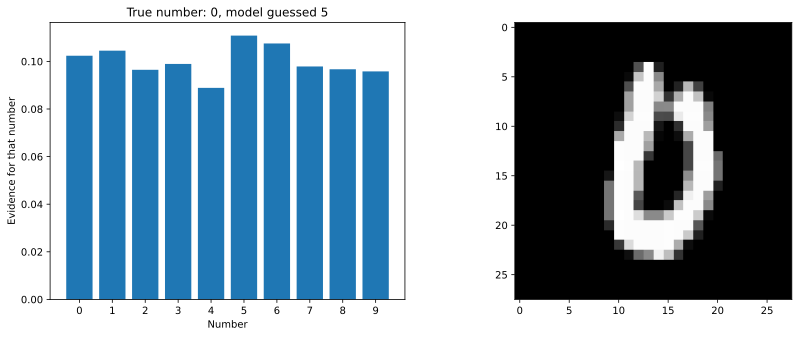

In [128]:
# find the errors
errors = np.where( torch.max(predictions,axis=1)[1] != y )[0]
print(errors)

# Evidence for all numbers from one sample
sample2show = 10

fig,ax = plt.subplots(1,2,figsize=(14,5))

ax[0].bar(range(10),np.exp(predictions[errors[sample2show]]))
ax[0].set_xticks(range(10))
ax[0].set_xlabel('Number')
ax[0].set_ylabel('Evidence for that number')
ax[0].set_title('True number: %s, model guessed %s'
                %( y[errors[sample2show]].item(), torch.argmax(predictions[errors[sample2show]]).item() ))

ax[1].imshow( np.reshape(X[errors[sample2show],:],(28,28)) ,cmap='gray')

plt.show()

# Additional explorations

In [129]:
# 1) Average together the correct 7's and the error 7's, and make images of them (that is, one image
#    of all correct 7's and one image of all incorrectly labeled 7's). How do they look?
# 
# 2) Repeat #1 for all numbers to produce a 2x10 matrix of images with corrects on top
#    and errors on the bottom.
# 
# 3) Identify "almost errors," which we can define as correct categorizations that had a probability of
#    e.g., >.1 for any other number. Make images of some of these numbers. Can you understand why the model
#    was confused?
# 
# 4) I didn't use .train(), .eval(), or no_grad() here. Is that a problem? Can you add those in without checking
#    other notebooks?
# 